# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 10<sup>th </sup> Computational Exercise

## Simulated Annealing and Parallel Computing

*In this computational exercise we adapted the genetic algorithm of the previous exercise in order:*
- *to solve the TSP with a simulated annealing search of the best path*
- *to use the MPI library to parallelize the search of the best tours to multiple cores.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

## A. Simulated Annealing solution of the Travelling Salesman Problem

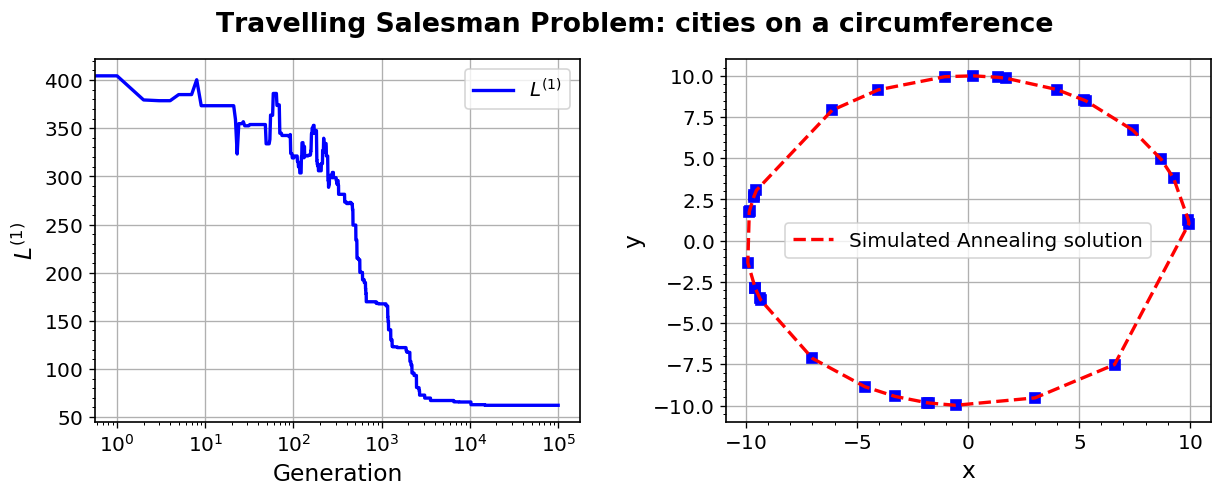

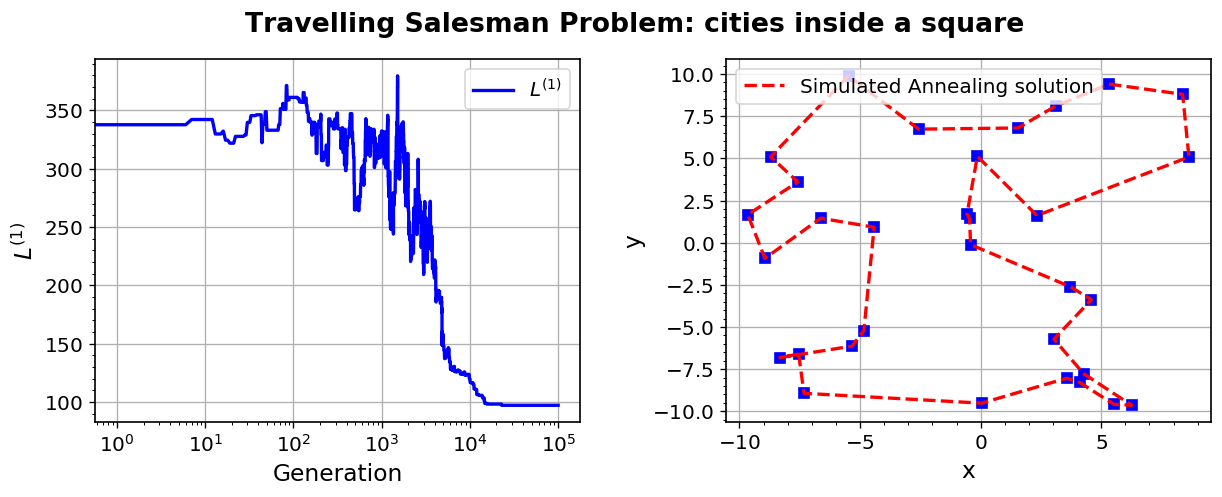

In [3]:
cities_configuration = np.loadtxt("data/circle_cities_config.txt").T
cities_configuration2 = np.loadtxt("data/square_cities_config.txt").T
circle_solution = np.loadtxt("data/circle_opt_tour.txt").T
square_solution = np.loadtxt("data/square_opt_tour.txt").T
optimal_lenght = np.loadtxt("data/circle_opt_length.txt").T
optimal_lenght2 = np.loadtxt("data/square_opt_length.txt").T

plt.figure(figsize=(12, 4), dpi=120)
plt.subplot(1, 2, 1);
plt.suptitle("Travelling Salesman Problem: cities on a circumference", size =16)
plt.plot(optimal_lenght[0], optimal_lenght[1], 'b-', lw = 2, label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.semilogx()
plt.subplot(1, 2, 2)
plt.plot(cities_configuration[1], cities_configuration[2], 'bs', markersize = 6)
plt.plot(circle_solution[1], circle_solution[2], 'r--', lw=2, label = "Simulated Annealing solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

plt.figure(figsize=(12, 4), dpi=120)
plt.subplot(1, 2, 1);
plt.suptitle("Travelling Salesman Problem: cities inside a square", size =16)
plt.plot(optimal_lenght2[0], optimal_lenght2[1], 'b-', lw = 2, label = '$L^{(1)}$')
plt.legend()
plt.xlabel("Generation")
plt.ylabel("$L^{(1)}$")
plt.semilogx()
plt.subplot(1, 2, 2)
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.plot(square_solution[1], square_solution[2], 'r--', lw=2, label = "Simulated Annealing solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

### Algorithms comparison: 

|  | Circumference |  Square |
|:---:|:---:|:---:|
| Genetic Algorithm | 62.2256| 96.5096 |
| Simulated Annealing | 62.2256| 97.1986 |


### B. Parallel computing solution of the Travelling Salesman Problem

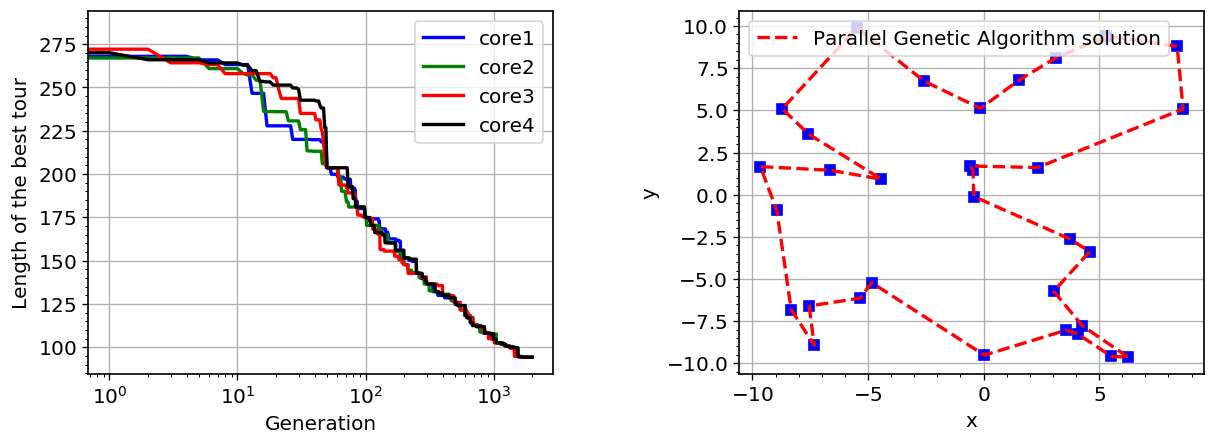

In [4]:
plt.figure(figsize = (12, 4), dpi=120)
plt.subplot(1, 2, 1);
colors = ['blue', 'green', 'red', 'black']
for i in range(4):
    core_length = np.loadtxt("Parallel_GA/core{}/optimal_length.0".format(i+1)).T
    plt.plot(core_length[0], core_length[1], color = colors[i], lw = 2, label = 'core{}'.format(i+1))

plt.xlabel("Generation", size=12)
plt.ylabel("Length of the best tour", size=12)
plt.semilogx()
plt.legend()

plt.subplot(1, 2, 2);
core_best_tour = np.loadtxt("Parallel_GA/core2/optimal_tour.0").T
plt.plot(cities_configuration2[1], cities_configuration2[2], 'bs', markersize = 6)
plt.plot(core_best_tour[1], core_best_tour[2], 'r--', lw=2, label = "Parallel Genetic Algorithm solution")
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.legend()
plt.show()

### Algorithms comparison: 

|  | Circumference |  Square |
|:---:|:---:|:---:|
|Parallel GA|  | 94.1844|
| Genetic Algorithm | 62.2256| 96.5096 |
| Simulated Annealing | 62.2256| 97.1986 |

**NB** We can see that the parallelization of the search of the best tour on multiple cores helps to improve the results found with the genetic algorithm.